# Experiment 5: Separate metafeatures

In [34]:
from src.experimenting.hopt_experiment import HoptExperiment
from src.pipeline_optimization.bayesian_hopt import BayesianHopt
from src.utils.metafeature_utils import pca_rank_cor, size, unit
from src.utils.thesis_utils import thesis_lookup_objective, thesis_search_space, get_standard_dataset
from src.metalearning.metadata import MetaDataset
from src.metalearning.warmstarter import Warmstarter
import pandas as pd
import pickle
import dill
from tqdm import tqdm

### Global parameters

In [35]:
max_evals = 100
duplicates = 3
n_init_configs = 5
dataset_names = !ls ../../data/metadata/interim

### Fixed parts of the experiment

In [36]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset = MetaDataset(metasamples, metafeature_functions=[size, unit])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = [metasample.identifier for metasample in metadataset.metasamples]

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:00<00:00, 3254.08it/s]


# Experiment

In [37]:
# initialize searches
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=max_evals
)
naive = BayesianHopt(
    identifier='Naive',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=n_init_configs
)
warm = BayesianHopt(
    identifier='Warmstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5)
)
cold = BayesianHopt(
    identifier='Coldstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5, cold=True)
)
hopt_exp_size = HoptExperiment(
    hopts=[naive, warm, cold],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset
)

In [38]:
hopt_exp_size.run_hopt_experiment(target_ids)

Target time series: 100%|██████████| 32/32 [45:28<00:00, 85.27s/it]


# Badly tuned warmstart (Size)

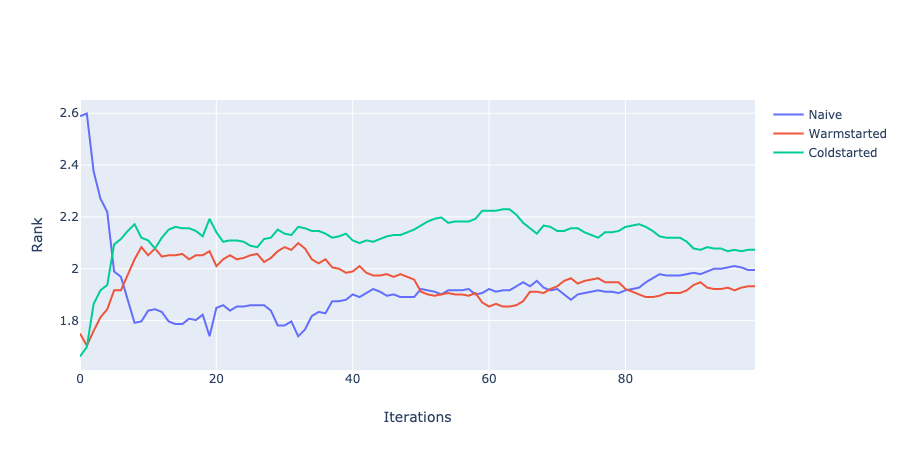

In [39]:
from src.visualization.hopt_experiment_visualizers import visualize_avg_ranks
visualize_avg_ranks(hopt_exp_size)

# Input richness

In [40]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset = MetaDataset(metasamples, metafeature_functions=[pca_rank_cor, unit])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = [metasample.identifier for metasample in metadataset.metasamples]

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:01<00:00, 21.71it/s]


# Experiment

In [41]:
# initialize searches
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=max_evals
)
naive = BayesianHopt(
    identifier='Naive',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=n_init_configs
)
warm = BayesianHopt(
    identifier='Warmstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5)
)
cold = BayesianHopt(
    identifier='Coldstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5, cold=True)
)
hopt_exp_input_richness = HoptExperiment(
    hopts=[naive, warm, cold],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset
)

In [42]:
hopt_exp_input_richness.run_hopt_experiment(target_ids)

Target time series: 100%|██████████| 32/32 [45:10<00:00, 84.70s/it]


# Badly tuned warmstart (Input richness)

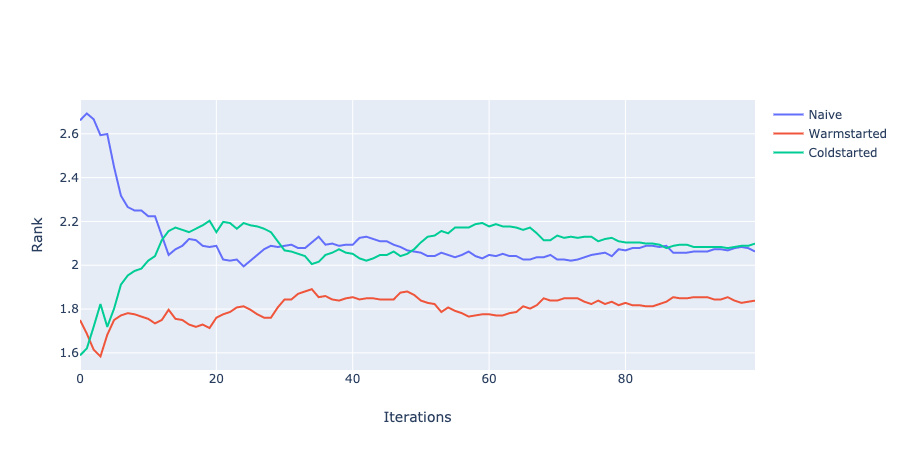

In [43]:
from src.visualization.hopt_experiment_visualizers import visualize_avg_ranks
visualize_avg_ranks(hopt_exp_input_richness)

# Input richness

In [44]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset = MetaDataset(metasamples, metafeature_functions=[size, unit])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = [metasample.identifier for metasample in metadataset.metasamples]

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:00<00:00, 3049.85it/s]


# Experiment

In [45]:
# initialize searches
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=max_evals
)
naive = BayesianHopt(
    identifier='Naive',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=n_init_configs
)
warm = BayesianHopt(
    identifier='Warmstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=5)
)
cold = BayesianHopt(
    identifier='Coldstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=5, cold=True)
)
hopt_exp_input_richness = HoptExperiment(
    hopts=[naive, warm, cold],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset
)

In [46]:
hopt_exp_input_richness.run_hopt_experiment(target_ids)

Target time series: 100%|██████████| 32/32 [56:33<00:00, 106.05s/it] 


# Well tuned warmstart (size)

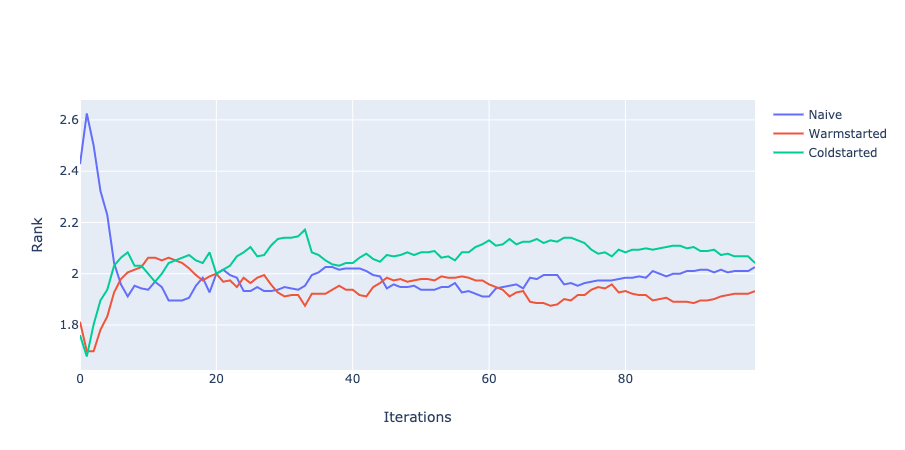

In [47]:
from src.visualization.hopt_experiment_visualizers import visualize_avg_ranks
visualize_avg_ranks(hopt_exp_input_richness)

# Input richness

In [48]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset = MetaDataset(metasamples, metafeature_functions=[pca_rank_cor, unit])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = [metasample.identifier for metasample in metadataset.metasamples]

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:01<00:00, 21.92it/s]


# Experiment

In [49]:
# initialize searches
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=max_evals
)
naive = BayesianHopt(
    identifier='Naive',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=n_init_configs
)
warm = BayesianHopt(
    identifier='Warmstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=5)
)
cold = BayesianHopt(
    identifier='Coldstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=5, cold=True)
)
hopt_exp_input_richness = HoptExperiment(
    hopts=[naive, warm, cold],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset
)

In [50]:
hopt_exp_input_richness.run_hopt_experiment(target_ids)

Target time series: 100%|██████████| 32/32 [42:38<00:00, 79.94s/it]


# Well tuned warmstart (input richness)

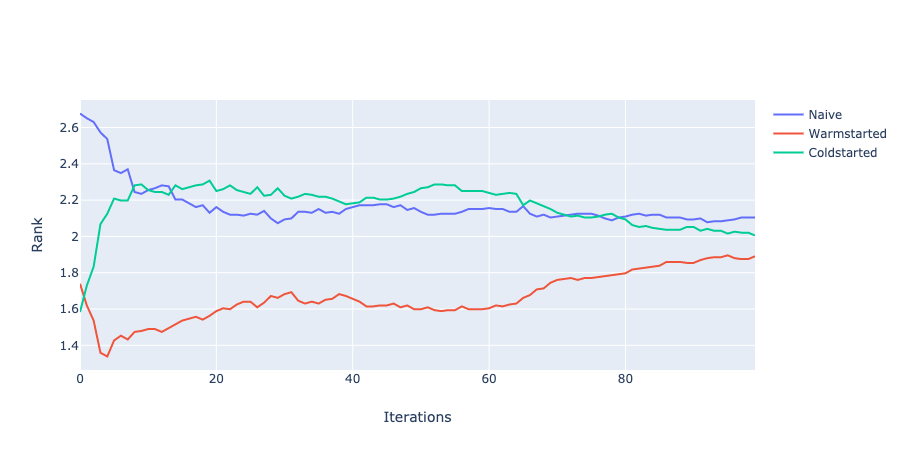

In [51]:
from src.visualization.hopt_experiment_visualizers import visualize_avg_ranks
visualize_avg_ranks(hopt_exp_input_richness)